# Melissa Onwuka 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('Titanic machine learning train.csv')
test_df = pd.read_csv('Titanic machine learning .csv')

# Preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


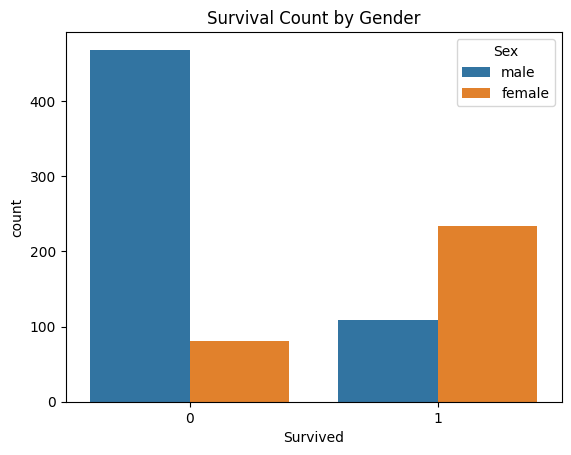

In [19]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count by Gender')
plt.show()

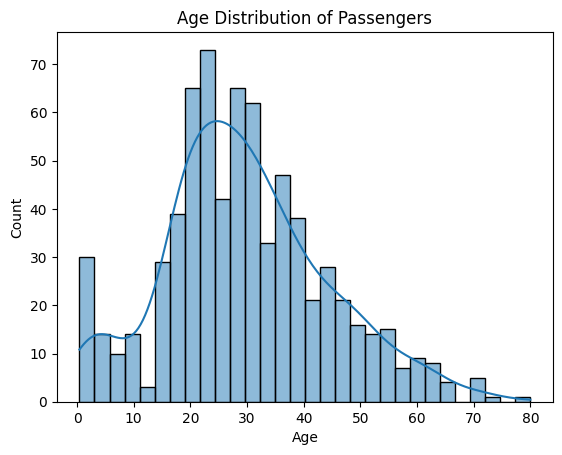

In [20]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

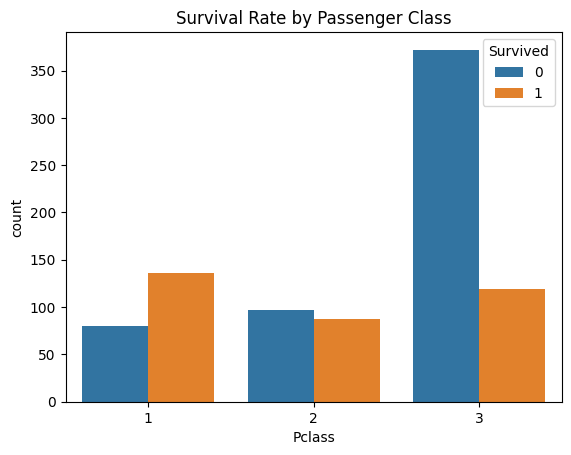

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [22]:
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Select relevant features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

# Preview the prepared data
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Train the model
model.fit(X_train, y_train)

Cross-validation scores: [0.79888268 0.81460674 0.84831461 0.78651685 0.82022472]
Mean cross-validation score: 0.813709120582512


RandomForestClassifier(random_state=42)

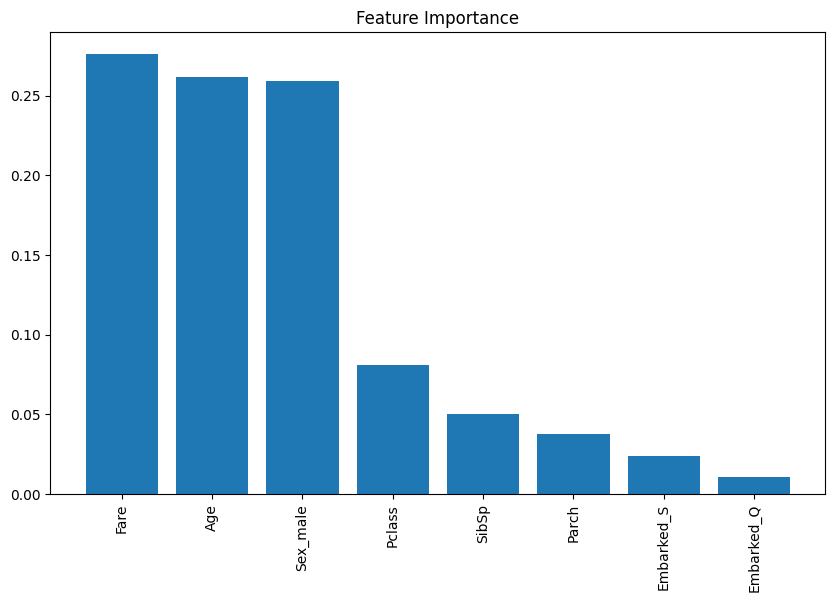

In [24]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [25]:
# Predict on the test set
predictions = model.predict(X_test)

# Prepare the submission
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

# Save the submission
submission_df.to_csv('titanic_submission.csv', index=False)

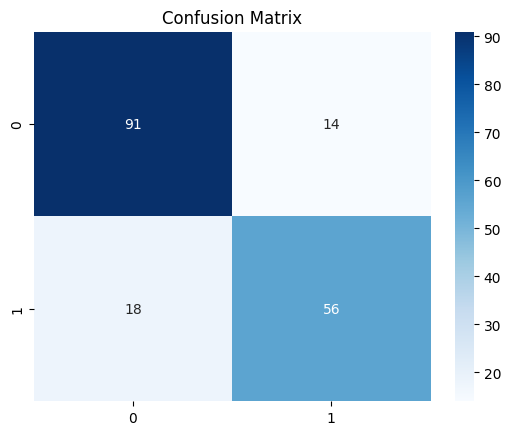

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the training set for validation
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model again
model.fit(X_train_split, y_train_split)

# Validate the model
y_pred = model.predict(X_valid)

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_valid, y_pred))